In [3]:
from google.colab import files
uploaded = files.upload()

Saving data_science_jobs_indeed_usa.csv.zip to data_science_jobs_indeed_usa.csv.zip


In [4]:
from google.colab import files
uploaded = files.upload()

Saving job_postings.csv.zip to job_postings.csv.zip


In [5]:
from google.colab import files
uploaded = files.upload()

Saving jobs-in-data-openings.csv.zip to jobs-in-data-openings.csv.zip


In [6]:
from google.colab import files
uploaded = files.upload()

Saving data_science_job_listings - data_science_job_listings.csv to data_science_job_listings - data_science_job_listings.csv


In [7]:
from google.colab import files
uploaded = files.upload()

Saving 700_ai_data_science_roles_2025 - 700_ai_data_science_roles_2025.csv to 700_ai_data_science_roles_2025 - 700_ai_data_science_roles_2025.csv


In [8]:
import os

# List all files in the current directory
for f in os.listdir():
    print(f)

.config
jobs-in-data-openings.csv.zip
data_science_jobs_indeed_usa.csv.zip
data_science_job_listings - data_science_job_listings.csv
700_ai_data_science_roles_2025 - 700_ai_data_science_roles_2025.csv
job_postings.csv.zip
sample_data


In [9]:
import pandas as pd
import zipfile, os

# --- Unzip all uploaded files ---
files = [
    "data_science_jobs_indeed_usa.csv.zip",
    "job_postings.csv.zip",
    "jobs-in-data-openings.csv.zip",
    "data_science_job_listings - data_science_job_listings.csv",
    "700_ai_data_science_roles_2025 - 700_ai_data_science_roles_2025.csv"
]

for f in files:
    if f.endswith(".zip"):
        with zipfile.ZipFile(f, 'r') as zip_ref:
            zip_ref.extractall()

# --- Load datasets (update names if needed after unzip) ---
datasets = {
    "indeed_jobs": "data_science_jobs_indeed_usa.csv",
    "job_postings": "job_postings.csv",
    "jobs_in_data": "jobs-in-data-openings.csv",
    "job_listings": "data_science_job_listings - data_science_job_listings.csv",
    "ai_roles": "700_ai_data_science_roles_2025 - 700_ai_data_science_roles_2025.csv"
}

dfs = {}
for name, path in datasets.items():
    if os.path.exists(path):
        df = pd.read_csv(path)
        dfs[name] = df
        print(f"\n--- {name.upper()} ---")
        print(df.info())
        print("\nMissing values:\n", df.isna().sum())
        print("\nDuplicate rows:", df.duplicated().sum())
        print("\nSample rows:\n", df.head(3))
    else:
        print(f"⚠️ File {path} not found")


--- INDEED_JOBS ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1200 non-null   int64  
 1   Title         1200 non-null   object 
 2   Company       1200 non-null   object 
 3   Location      1200 non-null   object 
 4   Rating        745 non-null    float64
 5   Date          1200 non-null   object 
 6   Salary        582 non-null    object 
 7   Description   1200 non-null   object 
 8   Links         1200 non-null   object 
 9   Descriptions  1200 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 93.9+ KB
None

Missing values:
 Unnamed: 0        0
Title             0
Company           0
Location          0
Rating          455
Date              0
Salary          618
Description       0
Links             0
Descriptions      0
dtype: int64

Duplicate rows: 0

Sample rows:
    Unnamed: 0          

In [10]:
import os

# List all files in the current directory
for f in os.listdir():
    print(f)

.config
job_postings.csv
data_science_jobs_indeed_usa.csv
jobs-in-data-openings.csv.zip
data_science_jobs_indeed_usa.csv.zip
jobs-in-data-openings.csv
data_science_job_listings - data_science_job_listings.csv
700_ai_data_science_roles_2025 - 700_ai_data_science_roles_2025.csv
job_postings.csv.zip
sample_data


In [11]:
import os

for f in os.listdir():
    if f.endswith(".csv"):
        print(f)

job_postings.csv
data_science_jobs_indeed_usa.csv
jobs-in-data-openings.csv
data_science_job_listings - data_science_job_listings.csv
700_ai_data_science_roles_2025 - 700_ai_data_science_roles_2025.csv


In [12]:
import pandas as pd

# Step 1: Define dataset mapping with exact names
datasets = {
    "ai_roles": "700_ai_data_science_roles_2025 - 700_ai_data_science_roles_2025.csv",
    "job_listings": "data_science_job_listings - data_science_job_listings.csv",
    "job_postings": "job_postings.csv",
    "indeed_jobs": "data_science_jobs_indeed_usa.csv",
    "jobs_in_data": "jobs-in-data-openings.csv"
}

# Step 2: Load and clean column names
dfs = {}
for name, path in datasets.items():
    df = pd.read_csv(path, encoding="utf-8", low_memory=False)
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
    dfs[name] = df
    print(f"✅ Loaded {name}: {df.shape}")

# Step 3: Standardize relevant columns
standardized_dfs = []
for name, df in dfs.items():
    cols = [c for c in df.columns if any(k in c for k in [
        "title","role","job","position",
        "company","organization","employer",
        "location","city","state","country",
        "salary","pay","compensation",
        "date","posted","description"
    ])]

    temp = df[cols].copy()
    temp["source"] = name  # Track dataset origin
    standardized_dfs.append(temp)

# Step 4: Merge everything into one master dataset
master_df = pd.concat(standardized_dfs, ignore_index=True)

print("\n✅ Master dataset created!")
print("Shape:", master_df.shape)
print("Columns:", master_df.columns.tolist())
print("Sample rows:\n", master_df.head(5))

✅ Loaded ai_roles: (735, 14)
✅ Loaded job_listings: (5000, 12)
✅ Loaded job_postings: (12217, 15)
✅ Loaded indeed_jobs: (1200, 10)
✅ Loaded jobs_in_data: (130301, 5)

✅ Master dataset created!
Shape: (149453, 32)
Columns: ['company', 'location', 'positionname', 'description', 'salary', 'jobtype/0', 'jobtype/1', 'jobtype/2', 'jobtype/3', 'searchinput/country', 'searchinput/position', 'source', 'job_title', 'job_category', 'salary_currency', 'salary_in_usd', 'company_location', 'company_size', 'job_link', 'job_location', 'search_city', 'search_country', 'search_position', 'job_level', 'job_type', 'title', 'date', 'descriptions', 'job_title_text', 'job_descr_text', 'salary_low', 'salary_high']
Sample rows:
            company             location  \
0           Google        San Bruno, CA   
1           BAXTER  Milwaukee, WI 53214   
2             Meta          Redmond, WA   
3             Meta   Bellevue, WA 98005   
4  Lockheed Martin    Shelton, CT 06484   

                           

In [13]:
# Step 1: Standardize column names into consistent ones
rename_map = {
    "title": "job_title",
    "job_title": "job_title",
    "role": "job_title",
    "position": "job_title",

    "company": "company",
    "organization": "company",
    "employer": "company",

    "location": "location",
    "city": "location",
    "state": "location",
    "country": "location",

    "salary": "salary",
    "pay": "salary",
    "compensation": "salary",

    "date": "date_posted",
    "posted": "date_posted",
    "posted_date": "date_posted",

    "description": "description",
    "job_description": "description"
}

# Apply renaming across columns
master_df = master_df.rename(columns=lambda c: rename_map.get(c, c))

# Step 2: Keep only the standardized columns
keep_cols = ["job_title", "company", "location", "salary", "date_posted", "description", "source"]
master_df = master_df[[c for c in keep_cols if c in master_df.columns]]

# Step 3: Drop rows missing job_title
master_df = master_df.dropna(subset=["job_title"])

# Step 4: Fill missing values in other columns
master_df["company"] = master_df["company"].fillna("Unknown")
master_df["location"] = master_df["location"].fillna("Unknown")
master_df["salary"] = master_df["salary"].fillna("Not Provided")
master_df["date_posted"] = master_df["date_posted"].fillna("Not Provided")
master_df["description"] = master_df["description"].fillna("")

print("✅ Cleaned dataset ready!")
print("Shape:", master_df.shape)
print("Missing values:\n", master_df.isna().sum())
print(master_df.head(10))

✅ Cleaned dataset ready!
Shape: (0, 8)
Missing values:
 job_title      0
job_title      0
company        0
location       0
salary         0
date_posted    0
description    0
source         0
dtype: int64
Empty DataFrame
Columns: [job_title, job_title, company, location, salary, date_posted, description, source]
Index: []


In [16]:
print(master_df.columns.tolist())

['job_title', 'job_title', 'company', 'location', 'salary', 'date_posted', 'description', 'source']


In [17]:
# Drop duplicate job_title columns, keep the first one
master_df = master_df.loc[:, ~master_df.columns.duplicated()]

# Double-check
print(master_df.columns.tolist())

['job_title', 'company', 'location', 'salary', 'date_posted', 'description', 'source']


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# --- 1) Rebuild a SINGLE job_title from any title-like columns (handles duplicates) ---
# Grab ALL columns whose names are exactly job_title/title/role/position (duplicates preserved)
title_candidates = master_df.filter(regex=r'^(job_title|title|role|position)$')
print("Title candidate columns:", list(title_candidates.columns), "shape:", title_candidates.shape)

# Treat empty strings as NA for proper backfill
title_candidates = title_candidates.replace(r'^\s*$', pd.NA, regex=True)

# Take the first non-null value across the candidate columns for each row
if title_candidates.shape[1] > 0:
    unified_title = title_candidates.bfill(axis=1).iloc[:, 0]
else:
    unified_title = pd.Series(pd.NA, index=master_df.index)

# Clean to strings; turn 'nan' and blanks into NA
unified_title = unified_title.astype(str).str.strip()
unified_title = unified_title.replace({'nan': pd.NA, '': pd.NA})

# Attach back
master_df['job_title'] = unified_title

# --- 2) Drop rows with no title; remove duplicate-named columns globally ---
master_df = master_df.dropna(subset=['job_title'])
master_df = master_df.loc[:, ~master_df.columns.duplicated()]

# Optional tidy-up
master_df['job_title'] = master_df['job_title'].str.replace(r'\s+', ' ', regex=True)

print("Non-empty titles:", master_df['job_title'].notna().sum())
print(master_df['job_title'].head(10))

# --- 3) Q1: Top 15 job titles (raw, no normalization) ---
top_titles = master_df['job_title'].value_counts().head(15)
print(top_titles)

if top_titles.empty:
    print("⚠️ Still no titles found. Show a few rows to debug:")
    display(master_df.head(5).T)
else:
    plt.figure(figsize=(12,6))
    top_titles.plot(kind='bar')
    plt.title("Top 15 Data Job Titles")
    plt.xlabel("Job Title")
    plt.ylabel("Number of Postings")
    plt.xticks(rotation=75)
    plt.tight_layout()
    plt.show()

Title candidate columns: ['job_title'] shape: (0, 1)
Non-empty titles: 0
Series([], Name: job_title, dtype: object)
Series([], Name: count, dtype: int64)
⚠️ Still no titles found. Show a few rows to debug:


""
job_title
company
location
salary
date_posted
description
source


Loaded ai_roles: (735, 14)
Loaded job_listings: (5000, 12)
Loaded job_postings: (12217, 15)
Loaded indeed_jobs: (1200, 10)
Loaded jobs_in_data: (130301, 5)
Master shape: (18417, 7)
                                job_title location description  salary  \
735  Machine Learning Engineer  in office  unknown              186597   
736                Statistician  (Remote)  unknown              110630   
737             Machine Learning Engineer  unknown               61280   

      date_posted  company        source  
735  not provided  unknown  job_listings  
736  not provided  unknown  job_listings  
737  not provided  unknown  job_listings  
job_title
Data Engineer                           597
Data Scientist                          540
Data Analyst                            448
Machine Learning Engineer               421
Data Engineer  in office                372
Statistician                            354
Data Analyst  in office                 339
Data Engineer  (Remote)         

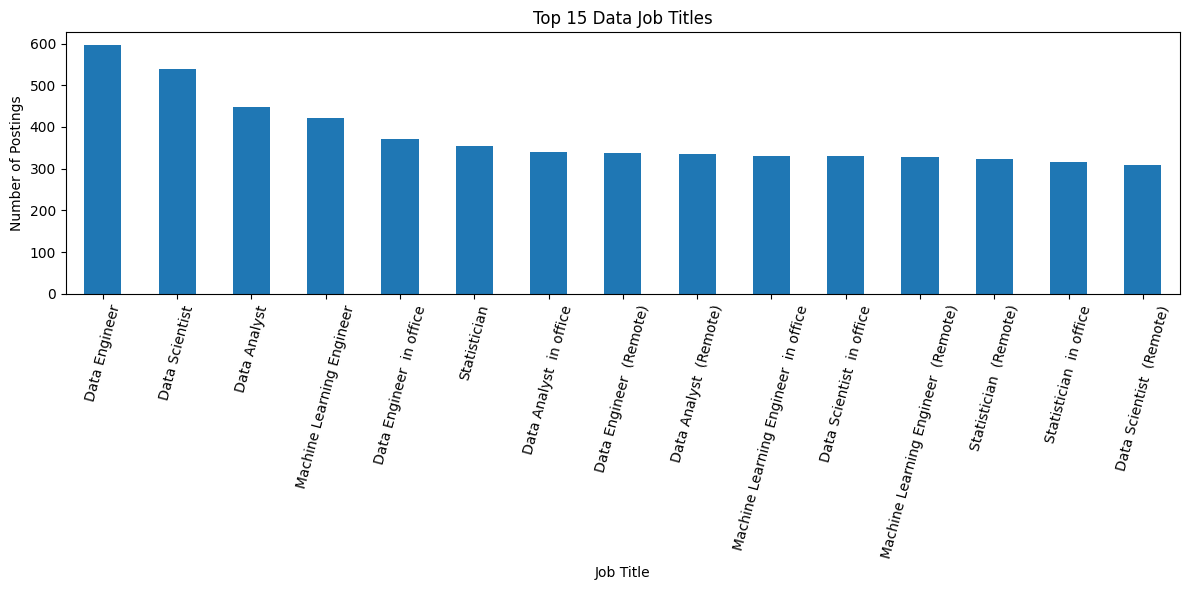

r                   1199
machine learning     202
sql                   56
python                29
statistics            29
deep learning         27
aws                   25
azure                 23
excel                 12
power bi              11
spark                 11
tableau                8
gcp                    7
hadoop                 7
dtype: int64


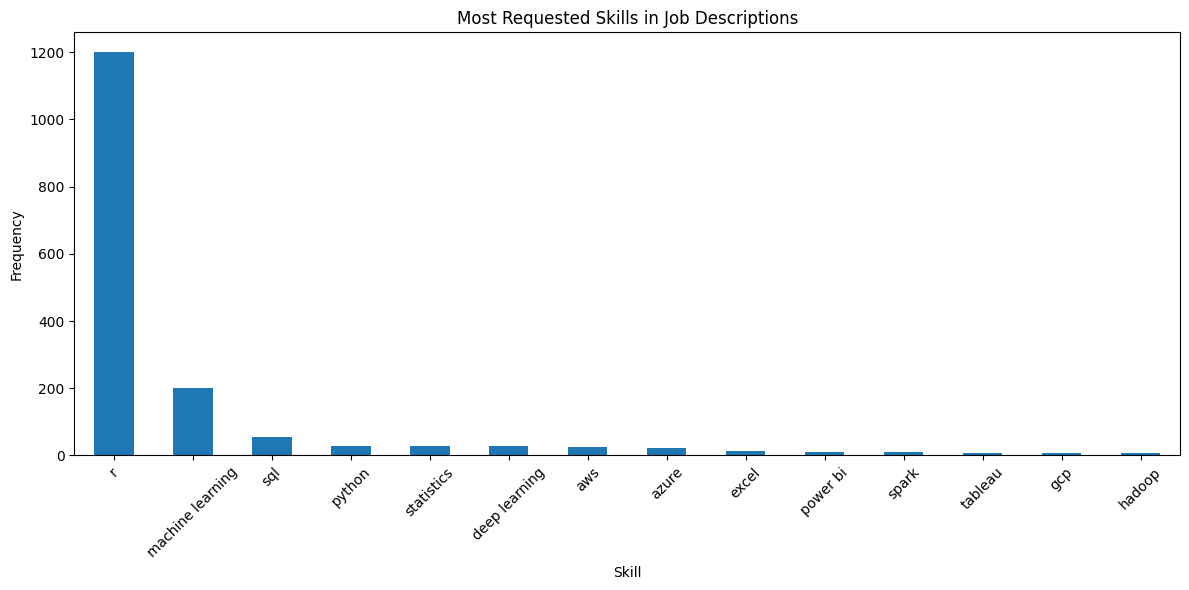

location
unknown                            5001
New York, NY                        305
Remote                              283
Chicago, IL                         237
London, England, United Kingdom     232
San Francisco, CA                   206
Washington, DC                      176
Austin, TX                          172
Seattle, WA                         168
Dallas, TX                          159
Name: count, dtype: int64


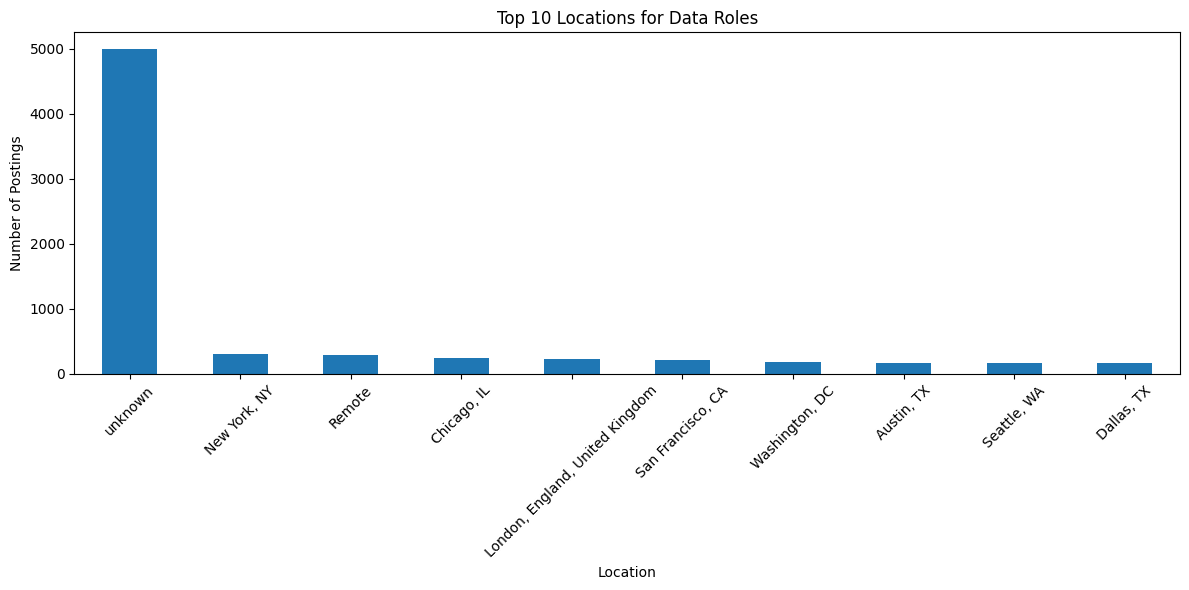

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------- 1) Reload the raw CSVs with the exact filenames you gave ----------
paths = {
    "ai_roles": "700_ai_data_science_roles_2025 - 700_ai_data_science_roles_2025.csv",
    "job_listings": "data_science_job_listings - data_science_job_listings.csv",
    "job_postings": "job_postings.csv",
    "indeed_jobs": "data_science_jobs_indeed_usa.csv",
    "jobs_in_data": "jobs-in-data-openings.csv",
}

raw_dfs = {}
for k, p in paths.items():
    df = pd.read_csv(p, low_memory=False)
    # normalize column names for easier matching
    df.columns = (
        df.columns.str.strip()
                  .str.lower()
                  .str.replace(r"\s+", "_", regex=True)
                  .str.replace(r"[^a-z0-9_]", "", regex=True)
    )
    raw_dfs[k] = df
    print(f"Loaded {k}: {df.shape}")

# ---------- 2) Helper: coalesce across many possible names ----------
def coalesce_cols(df, candidates):
    present = [c for c in candidates if c in df.columns]
    if not present:
        return pd.Series([np.nan]*len(df), index=df.index)
    s = df[present].replace(r"^\s*$", np.nan, regex=True).bfill(axis=1).iloc[:,0]
    return s

# plausible names per field across mixed datasets
TITLE_CANDS = [
    "job_title","title","job","position","role","jobname","posting_title","jobtitle"
]
LOC_CANDS = [
    "location","city","state","country","job_location","office_location","geo"
]
DESC_CANDS = [
    "description","job_description","full_description","summary","jd","details"
]
SAL_CANDS = [
    "salary","salary_year","salary_month","salary_range","pay","compensation","annual_salary"
]
DATE_CANDS = [
    "date_posted","posted_date","post_date","date","created","publication_date"
]

# ---------- 3) Build standardized slices and concatenate ----------
std_frames = []
for src, df in raw_dfs.items():
    out = pd.DataFrame(index=df.index)
    out["job_title"]   = coalesce_cols(df, TITLE_CANDS)
    out["location"]    = coalesce_cols(df, LOC_CANDS)
    out["description"] = coalesce_cols(df, DESC_CANDS)
    out["salary"]      = coalesce_cols(df, SAL_CANDS)
    out["date_posted"] = coalesce_cols(df, DATE_CANDS)
    out["company"]     = coalesce_cols(df, ["company","employer","organization","company_name"])
    out["source"]      = src
    std_frames.append(out)

master_df = pd.concat(std_frames, ignore_index=True)

# clean empties/whitespace
for c in ["job_title","location","description","salary","date_posted","company"]:
    master_df[c] = master_df[c].astype(str).str.strip()
    master_df[c] = master_df[c].replace({"": np.nan, "nan": np.nan})

# drop rows with no title; fill other fields for robustness
master_df = master_df.dropna(subset=["job_title"])
master_df["company"]     = master_df["company"].fillna("unknown")
master_df["location"]    = master_df["location"].fillna("unknown")
master_df["salary"]      = master_df["salary"].fillna("not provided")
master_df["date_posted"] = master_df["date_posted"].fillna("not provided")
master_df["description"] = master_df["description"].fillna("")

print("Master shape:", master_df.shape)
print(master_df.head(3))

# ---------- 4) Q1: Most in-demand roles (raw titles) ----------
top_titles = master_df["job_title"].value_counts().head(15)
print(top_titles)

if not top_titles.empty:
    plt.figure(figsize=(12,6))
    top_titles.plot(kind="bar")
    plt.title("Top 15 Data Job Titles")
    plt.xlabel("Job Title")
    plt.ylabel("Number of Postings")
    plt.xticks(rotation=75)
    plt.tight_layout()
    plt.show()
else:
    print("No titles found — inspect columns:", master_df.columns.tolist()[:30])

# ---------- 5) Q2: Most requested skills ----------
skills = ["python","sql","r","excel","tableau","power bi",
          "aws","azure","gcp","spark","hadoop",
          "machine learning","deep learning","statistics"]

desc = master_df["description"].astype(str).str.lower()
skill_counts = pd.Series({s: desc.str.contains(s, na=False).sum() for s in skills}).sort_values(ascending=False)
print(skill_counts)

if not skill_counts.empty:
    plt.figure(figsize=(12,6))
    skill_counts.plot(kind="bar")
    plt.title("Most Requested Skills in Job Descriptions")
    plt.xlabel("Skill")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# ---------- 6) Q3: Job openings by location ----------
loc_series = master_df["location"].astype(str).str.strip()
loc_series = loc_series[loc_series.astype(bool)]
top_locations = loc_series.value_counts().head(10)
print(top_locations)

if not top_locations.empty:
    plt.figure(figsize=(12,6))
    top_locations.plot(kind="bar")
    plt.title("Top 10 Locations for Data Roles")
    plt.xlabel("Location")
    plt.ylabel("Number of Postings")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-920039829.py:15: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask_keep = ~loc_raw.str.strip().str.lower().isin(exclude_vals) & ~loc_raw.str.lower().str.contains(junk_pattern, regex=True, na=False)


Top states:
 location
CA    1383
TX     916
NY     727
VA     703
IL     477
NJ     462
FL     422
PA     420
MA     418
OH     388
Name: count, dtype: int64

Excluded (unknown/remote/non-US/unparseable): 43.0% of postings


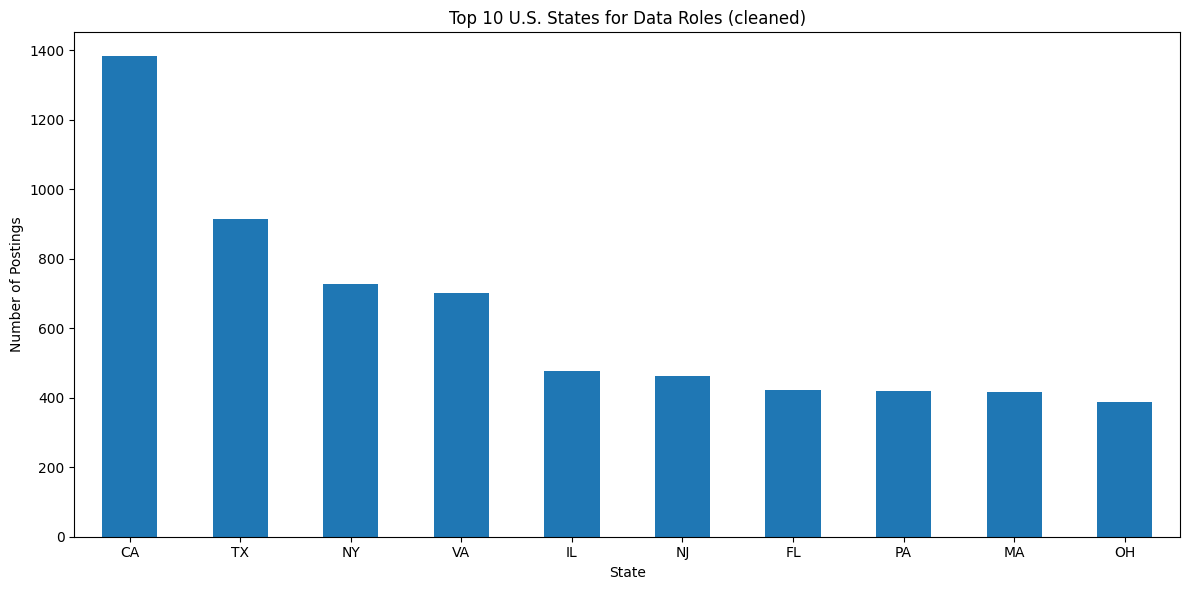

In [20]:
if "master_df" not in globals():
  raise RuntimeError("master_df is not defined. Re-run the data loading + cleaning block first.")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# 0) Start from your master_df
loc_raw = master_df["location"].astype(str)

# 1) Exclude junk
exclude_vals = {"", "unknown", "n/a", "na", "none", "not provided", "-", "—", "unspecified"}
junk_pattern = r"\b(remote|hybrid)\b"
mask_keep = ~loc_raw.str.strip().str.lower().isin(exclude_vals) & ~loc_raw.str.lower().str.contains(junk_pattern, regex=True, na=False)
loc = loc_raw[mask_keep].str.strip()

# 2) US state mapping (50 states + DC + PR)
state_map = {
    "ALABAMA":"AL","ALASKA":"AK","ARIZONA":"AZ","ARKANSAS":"AR","CALIFORNIA":"CA","COLORADO":"CO","CONNECTICUT":"CT",
    "DELAWARE":"DE","FLORIDA":"FL","GEORGIA":"GA","HAWAII":"HI","IDAHO":"ID","ILLINOIS":"IL","INDIANA":"IN",
    "IOWA":"IA","KANSAS":"KS","KENTUCKY":"KY","LOUISIANA":"LA","MAINE":"ME","MARYLAND":"MD","MASSACHUSETTS":"MA",
    "MICHIGAN":"MI","MINNESOTA":"MN","MISSISSIPPI":"MS","MISSOURI":"MO","MONTANA":"MT","NEBRASKA":"NE","NEVADA":"NV",
    "NEW HAMPSHIRE":"NH","NEW JERSEY":"NJ","NEW MEXICO":"NM","NEW YORK":"NY","NORTH CAROLINA":"NC","NORTH DAKOTA":"ND",
    "OHIO":"OH","OKLAHOMA":"OK","OREGON":"OR","PENNSYLVANIA":"PA","RHODE ISLAND":"RI","SOUTH CAROLINA":"SC",
    "SOUTH DAKOTA":"SD","TENNESSEE":"TN","TEXAS":"TX","UTAH":"UT","VERMONT":"VT","VIRGINIA":"VA","WASHINGTON":"WA",
    "WEST VIRGINIA":"WV","WISCONSIN":"WI","WYOMING":"WY","DISTRICT OF COLUMBIA":"DC","WASHINGTON DC":"DC","DC":"DC",
    "PUERTO RICO":"PR"
}
abbr_set = set(state_map.values())

# 3) Normalize to UPPER for parsing
loc_up = loc.str.upper()

# 4) Try to extract 2-letter state codes (e.g., "CITY, TX" or "BOSTON MA")
two_letter = loc_up.str.extract(r"(?:,\s*|[\s/])([A-Z]{2})(?:\s|,|$)", expand=False)

# 5) Try to extract full state names anywhere, then map to abbr
# Build a single regex of full names, longest first to avoid matching "WASHINGTON" inside "WASHINGTON DC" incorrectly
full_names_sorted = sorted(state_map.keys(), key=len, reverse=True)
full_pat = r"\b(" + "|".join(map(re.escape, full_names_sorted)) + r")\b"
full_hit = loc_up.str.extract(full_pat, expand=False)
full_to_abbr = full_hit.map(state_map)

# 6) Coalesce: prefer explicit 2-letter; otherwise mapped full name
state_series = two_letter.where(two_letter.isin(abbr_set), np.nan)
state_series = state_series.fillna(full_to_abbr)

# 7) Keep only valid US states
state_series = state_series[state_series.isin(abbr_set)]

# Stats for transparency
total = len(loc_raw)
used = len(state_series)
excluded_pct = 100 * (1 - used/total)

# 8) Plot
top_states = state_series.value_counts().head(10)
print("Top states:\n", top_states)
print(f"\nExcluded (unknown/remote/non-US/unparseable): {excluded_pct:.1f}% of postings")

plt.figure(figsize=(12,6))
top_states.plot(kind="bar")
plt.title("Top 10 U.S. States for Data Roles (cleaned)")
plt.xlabel("State")
plt.ylabel("Number of Postings")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()